In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlin inline
plt.style.use('ggplot')
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings=pd.read_csv('ratings_Beauty.csv')
amazon_ratings=amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
popular_products=pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular=popular_products.sort_values('Rating',ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

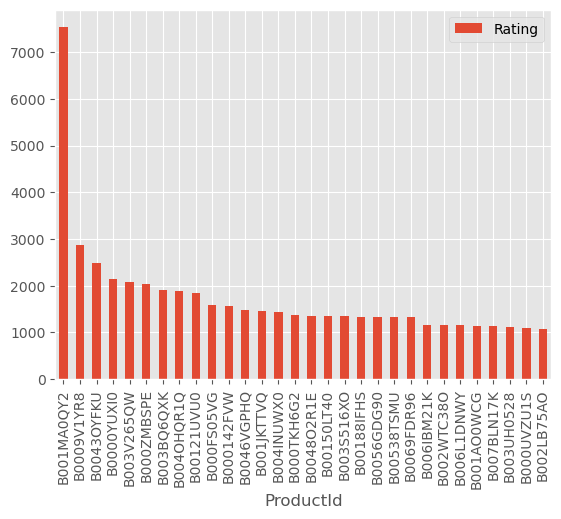

In [5]:
most_popular.head(30).plot(kind='bar')

In [6]:
#Subset of Amazon Ratings
amazon_ratings1=amazon_ratings.head(10000)

In [7]:
ratings_utility_matrix=amazon_ratings1.pivot_table(values='Rating',index='UserId',columns='ProductId',fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ratings_utility_matrix.shape

(9697, 886)

In [9]:
X=ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.shape

(886, 9697)

In [11]:
X1=X.copy()

In [12]:
SVD =TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [13]:
correlation_matrix=np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [14]:
X.index[77]

'535795545X'

In [15]:
i='535795545X'
product_names=list(X.index)
product_ID=product_names.index(i)
product_ID

77

In [16]:
correlation_product_ID=correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [17]:
Recommend=list(X.index[correlation_product_ID>0.90])
print(len(Recommend))

#Remove the item already bought by the customer
Recommend.remove(i)
Recommend[0:9]

117


['0737104473',
 '1403790965',
 '1906987238',
 '322700075X',
 '5357955832',
 '5357955867',
 '5357955948',
 '5357956014',
 '6022600685']

In [18]:
#Importing libraries for content based

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [19]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape


(124428, 2)

In [20]:
product_descriptions1=product_descriptions.head(500)
product_descriptions1['product_description'].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [21]:
vectorizer=TfidfVectorizer(stop_words='english')
X1=vectorizer.fit_transform(product_descriptions1['product_description'])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

/home/manita/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

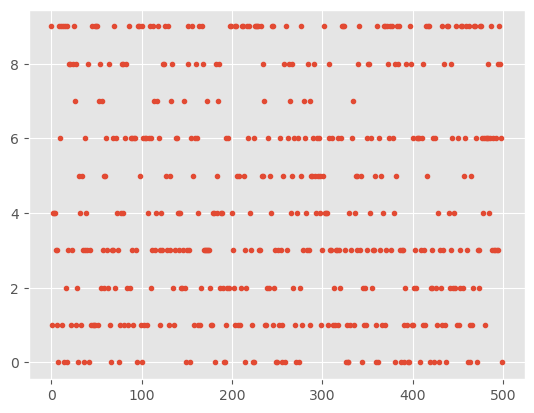

In [22]:
#Fitting K-Means to the dataset
X=X1.copy()
kmeans=KMeans(n_clusters=10,init='k-means++')
y_kmeans=kmeans.fit_predict(X)
plt.plot(y_kmeans,'.')
plt.show

In [23]:
product_descriptions1['Cluster']=y_kmeans
product_descriptions1

/tmp/ipykernel_5420/1398019954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_descriptions1['Cluster']=y_kmeans


,product_uid,product_description,Cluster
0,100001,"Not only do angles make joints stronger, they ...",9
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,1
2,100003,Classic architecture meets contemporary design...,4
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...,4
4,100005,Update your bathroom with the Delta Vero Singl...,4
...,...,...,...
495,100496,Add an updated look to your transitional decor...,3
496,100497,The BLACK+DECKER EM1700 corded electric lawn m...,9
497,100498,Wilsonart's 48 in. x 96 in. Breccia Nouvelle L...,8
498,100499,The new and improved roundup 2 gal. Multi-Purp...,6


In [24]:
def print_cluster(i):
        print('Cluster %d:'%i),
        for ind in order_centroids[i,:10]:
            print('%s'%terms[ind])
        return i

In [25]:
#Optimal cluster is
true_k=10
model=KMeans(n_clusters=true_k,init='k-means++',max_iter=100,n_init=1)
model.fit(X1)

print('Top terns per cluster:')
order_centroids=model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terns per cluster:
Cluster 0:
water
air
easy
installation
heater
high
ft
use
control
temperature
Cluster 1:
cutting
snow
power
easy
engine
pliers
blade
pruner
features
control
Cluster 2:
light
volt
watt
power
led
tool
20
battery
lithium
amp
Cluster 3:
metal
screws
screw
drill
gauge
steel
light
pre
hole
12
Cluster 4:
bamboo
panels
wood
fencing
natural
galvanized
shades
lumber
stained
brush
Cluster 5:
post
steel
fence
ft
patio
rail
frame
outdoor
posts
resistant
Cluster 6:
storage
shelves
easy
design
nickel
installation
solid
finish
adjustable
room
Cluster 7:
paint
roller
easy
ft
tape
wood
smooth
use
tool
surface
Cluster 8:
used
concrete
tile
stake
use
indoor
ground
look
grade
piece
Cluster 9:
insulation
door
attic
energy
ladder
opening
film
radiant
home
easy


In [26]:
def show_recommendations(product):
    Y=vectorizer.transform([product])
    prediction=model.predict(Y)
    i=print_cluster(prediction[0])
    return i

In [27]:
cluster=show_recommendations('cutting tool')
print(cluster)

Cluster 1:
cutting
snow
power
easy
engine
pliers
blade
pruner
features
control
1


In [28]:
product_descriptions1[product_descriptions1['cluster']==cluster]
p

KeyError: 'cluster'